# Assignment 5 - Better than a roulette
Matteo Scialpi

## Question 1
**Give a Bayesian solution to Question 4 of assignment 4, where seven scientists of varying capabilities have measured $\mu$ with personal noise level $\sigma_n$ and we are interested in inferring $\mu$. Let the prior on each $\sigma_n$ be a broad prior, for example a $\Gamma$ distribution with parameters $(s,c)=(10,0.1)$. Find the posterior distribution for $\mu$. Plot it and explore its properties for a variety of data sets such as the one given and the data set $\{x_n\}=\{13.01,7.39\}$.** \
**[Hint: first find the posterior distribution of $\sigma_n$ given $\mu$ and $x_n$, $\mathcal{P}(\sigma_n|x_n,\mu)$. Note that the normalizing constant for this inference is $\mathcal{P}(x_n|\mu)$. Marginalize over $\sigma_n$ to find this normalizing constant, then use Bayes' theorem a second time to find $\mathcal{P}(\mu|\{x_n\})$.]**

|Scientist|$x_n$|
|:-:|:-:|
|A|-27.020|
|B|3.570|
|C|8.191|
|D|9.898|
|E|9.603|
|F|9.945|
|G|10.056|

First of all, let's recap from Assignment 4 the likelihood of the problem, given by the product of different likelihood taking in to account one single $x_n$. We have found that
\begin{equation}
\mathscr{L}(\mu,\{\sigma_n\})=\mathcal{P}(\{x_n\}|\mu,\{\sigma_n\})=\prod_{n=1}^{N}\mathcal{P}(x_n|\mu,\sigma_n)=\prod_{n=1}^{N}\frac{1}{\sqrt{2\pi\,\sigma_n^2}}\,e^{-(x_n-\mu)^2/2\sigma_n^2}\,,
\end{equation}
where $N$ is the number of data (of different scientists). What we want to do is to calculate the posterior for $\mu$ given the data $\{x_n\}$. Use the Bayes theorem, we have
\begin{equation}
\mathcal{P}(\mu|\{x_n\})=\frac{\mathcal{P}(\{x_n\}|\mu)\,\mathcal{P}(\mu)}{\mathcal{P}(\{x_n\})}\propto\mathcal{P}(\{x_n\}|\mu)\,\mathcal{P}(\mu)\,,
\end{equation}
since the evidence at the denominator is a normalization constant. Supposing the prior as uninformative, we can set $P(\mu)=1$. Since different data $\{x_n\}$ are independent, we can exploit probability's property to write
\begin{equation}
\mathcal{P}(\mu|\{x_n\})\propto\mathcal{P}(\{x_n\}|\mu)=\mathcal{P}(x_1,\dots,x_N|\mu)=\prod_{n=1}^N\mathcal{P}(x_n|\mu)\,.
\end{equation}
This $\mathcal{P}(x_n|\mu)$ can be marginalised on the corresponding $\sigma_n$ value, but, instead of this, we are going to use the precision parameter $\beta_n=\sigma_n^{-2}$ to simplify calculations. For this we can use the conjugate prior as a $\Gamma$ distribution, with rate parameter $s$ (= (the given $s$)$^{-1}$) and the shape parameter $c$:
\begin{equation}
\text{Gamma}(\beta_n;s,c)\equiv\frac{s}{\Gamma(c)}\,\beta_n^{\,c-1}\,e^{-s\beta_n}\,.
\end{equation}
Marginalizing $\mathcal{P}(x_n|\mu)$, we have
\begin{equation}
\begin{split}
\mathcal{P}(x_n|\mu)&=\int_0^{+\infty}d\beta_n\,\mathcal{P}(x_n|\mu,\beta_n)\,\mathcal{P}(\beta_n)\\
&=\int_0^{+\infty}d\beta_n\,\frac{\beta_n^{1/2}}{\sqrt{2\pi}}\,e^{-\beta_n(x_n-\mu)^2/2}\,\frac{s^c}{\Gamma(c)}\,\beta_n^{\,c-1}\,e^{-s\beta_n}\\
&=\frac{s^c}{\Gamma(c)\sqrt{2\pi}}\int_0^{+\infty}d\beta_n\,\beta_n^{\,c-1/2}\,e^{-\beta_n(s+(x_n-\mu)^2/2)}
\end{split}\,.
\end{equation}
Using the Gamma integral
\begin{equation}
\int_0^{+\infty}dt\,t^ae^{-bt}=\frac{\Gamma(a+1)}{b^{\,a+1}}\,,
\end{equation}
we can write the posterior as
\begin{equation}
\mathcal{P}(\mu|\{x_n\})\propto\prod_{n=1}^N\mathcal{P}(x_n|\mu)=\prod_{n=1}^N\frac{s^c}{\Gamma\sqrt{2\pi}}\,\frac{\Gamma(c+1/2)}{\bigl[s+(x_n-\mu)^2/2\bigr]^{c+1/2}}\,.
\end{equation}

### Code
In the code below we can see firstly a plot of the $\beta_n$ prior (a $\Gamma$) and the $\sigma_n^2$ prior (an Inverse-$\Gamma$). Later on we can see the calculated posterior with $\{x_n\}$ given by seven scientists, while in the last plot the imput data are $\{x_n\}$ points given in the question.

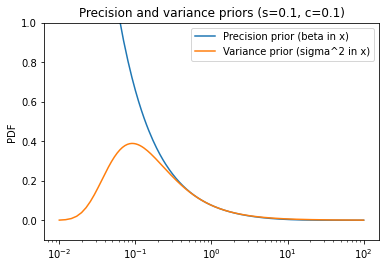

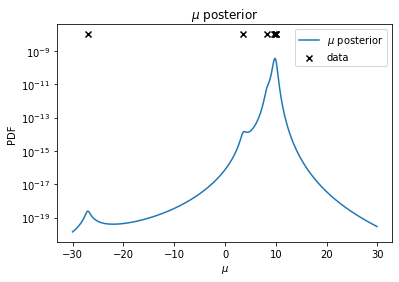

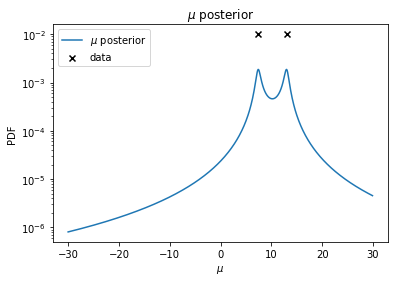

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as ss
import numpy.random as rnd

def pb(beta,c,s):
  prs=(s**c)*(beta**(c-1))*np.exp(-s*beta)/ss.gamma(c)
  return prs

def ps(sigma,c,s):
  prs=(s**c)*(sigma**(-(c+1)))*np.exp(-s/sigma)/ss.gamma(c)
  return prs

def posterior(x,s,c):
  mu=np.arange(-30.,30.,0.1)
  term=np.ones(len(mu),float)
  for j in range(len(x)):
    term*=(s**c*ss.gamma(c+0.5)/(np.sqrt(2.*np.pi)*ss.gamma(c)*(s+(x[j]-mu)**2./2.)**(c+0.5)))
  return mu,term

s=0.1
c=0.1
x=np.array([-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056])
beta=np.arange(0.01,100.,0.01)
sigma=np.arange(0.1,10.,0.01)
var=np.copy(sigma)**2.
prior_beta=pb(beta,c,s)
prior_var=ps(var,c,s)
plt.plot(beta,prior_beta,label='Precision prior (beta in x)')
plt.plot(var,prior_var,label='Variance prior (sigma^2 in x)')
plt.legend()
plt.xscale('log')
plt.ylabel('PDF')
plt.ylim(-0.1,1.)
plt.title(f'Precision and variance priors (s={s}, c={c})')
plt.show()

mu,post_mu=posterior(x,s,c)
plt.plot(mu,post_mu,label='$\mu$ posterior')
y_scatter=np.array([1e-8, 1e-8, 1e-8, 1e-8, 1e-8, 1e-8, 1e-8])
plt.scatter(x,y_scatter,label='data',color='black',marker='x')
plt.yscale('log')
plt.xlabel('$\mu$')
plt.ylabel('PDF')
plt.title('$\mu$ posterior')
plt.legend()
plt.show()

x2=np.array([13.01,7.39])
mu2,post_mu2=posterior(x2,s,c)
plt.plot(mu2,post_mu2,label='$\mu$ posterior')
y_scatter=np.array([1e-2, 1e-2])
plt.scatter(x2,y_scatter,label='data',color='black',marker='x')
plt.yscale('log')
plt.xlabel('$\mu$')
plt.ylabel('PDF')
plt.title('$\mu$ posterior')
plt.legend(loc='upper left')
plt.show()



## Question 2
**Implement Gibbs sampling for the Question 1.**

Gibbs' sampling (Gs) is a Monte Carlo (MC) method that allows to sample (at the $t$ iteration) the set of values (sample) $\{\theta_n^{\,(t)}\}_{n=1}^N$ from the hard distribution $P(\vec{\theta})$. This distribution is supposed impossible to sample directly. The sample $\{\theta_n^{\,(t)}\}_{n=1}^N$ that the Gs method wants to reach can be seen as the set of components of the $N$-dimensional vector
\begin{equation}
\vec{\theta}\,^{(t)}=\bigl(\theta_1^{\,(t)},\dots,\theta_N^{\,(t)}\bigr)\,.
\end{equation}
If $P(\vec{\theta})$ is impossible to sample, joint probabilities of its components are not. From them we can sample the $n$-th component of $\vec{\theta}\,^{(t)}$. The concept is that, starting from a guess vector $\vec{\theta}\,^{(t-1)}$, thanks to a first joint probability, one can sample an update for the corresponding $n$-th component, which can be substituted in $\vec{\theta}\,^{(t-1)}$ vector with the $t$-th value of iteration. Then, a second joint probability with in input the update vector can be sampled. This until all components are updated. In formulas (take particular attention on the number of the iteration):
\begin{equation}
\begin{split}
&\mathcal{P}(\theta_1^{\,(t)}|\theta_2^{\,(t-1)},\dots,\theta_N^{\,(t-1)})&\qquad\text{samples}&\qquad\theta_1^{\,(t)}\,,\\
&\mathcal{P}(\theta_2^{\,(t)}|\theta_1^{\,(t)},\theta_3^{\,(t-1)},\dots,\theta_N^{\,(t-1)})&\qquad\text{samples}&\qquad\theta_2^{\,(t)}\,,\\
&\qquad\qquad\qquad\qquad\qquad\dots\\
&\mathcal{P}(\theta_N^{\,(t)}|\theta_2^{\,(t)},\dots,\theta_{N-1}^{\,(t)})&\qquad\text{samples}&\qquad\theta_N^{\,(t)}\,.\\
\end{split}
\end{equation}

In our seven scientists' problem, we have
\begin{equation}
\vec{\theta}=(\mu,\sigma_1,\dots,\sigma_7)\,,
\end{equation}
from which we want to make inference. Our hard distribution from which we want to sample $\{\mu,\{\sigma_n\}\}$ is the posterior $\mathcal{P}(\mu,\{\sigma_n\}|\{x_n\})$. Using the Bayes theorem, we have
\begin{equation}
\mathcal{P}(\mu,\{\sigma_n\}|\{x_n\})=\frac{\mathcal{P}(\{x_n\}|\mu,\{\sigma_n\})\,\mathcal{P}(\mu,\{\sigma_n\})}{\mathcal{P}(\{x_n\})}\,,
\end{equation}
where $n$ in the $n$-th scientist index, for a total of $N=7$ scientists. Different components of our $\vec{\theta}$ could be taken as independent and we decide to take the prior on $\mu$ as uniform, to have a non-informative one. This means
\begin{equation}
\begin{split}
\mathcal{P}(\mu,\{\sigma_n\}|\{x_n\})&\propto\mathcal{P}(\{x_n\}|\mu,\{\sigma_n\})\,\mathcal{P}(\mu,\{\sigma_n\})\\
&=\mathcal{P}(\{x_n\}|\mu,\{\sigma_n\})\,\mathcal{P}(\mu)\,\prod_{n=1}^N\mathcal{P}(\{\sigma_n\})\\
&=\mathcal{P}(\{x_n\}|\mu,\{\sigma_n\})\,\prod_{n=1}^N\mathcal{P}(\{\sigma_n\})\\
&=\mathscr{L}(\mu,\{\sigma_n\})\,\prod_{n=1}^N\mathcal{P}(\sigma_n)\\
\end{split}\,.
\end{equation}
The first term is the Gaussian likelihood seen in the Question 1, while $\mathcal{P}(\sigma_n)$ is the Inverse-$\Gamma$ distribution for $\sigma_n^2$ in input. \
Anyway, what we care about are the joint probabilities $\mathcal{P}(\mu|\{\sigma_n\},\{x_n\})$ and $\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})$, where $x$ are data from seven scientists. They are important to sample updates respectively for $\mu$ and $\sigma_n$. Let's analise them separately.
* Using the Bayes theorem for $\mathcal{P}(\mu|\{\sigma_n\},x)$, we have
\begin{equation}
\mathcal{P}(\mu|\{\sigma_n\},\{x_n\})=\frac{\mathcal{P}(\{x_n\}|\mu,\{\sigma_n\})\,\mathcal{P}(\mu|\{\sigma_n\})}{\mathcal{P}(\{x_n\}|\{\sigma_n\})}\propto\mathscr{L}(\mu,\{\sigma_n\})\,\mathcal{P}(\mu|\{\sigma_n\})\,.
\end{equation}
Assuming $\mathcal{P}(\mu|\{\sigma_n\})=1$ (uninformative prior), we have
\begin{equation}
\mathcal{P}(\mu|\{\sigma_n\},\{x_n\})\propto\mathscr{L}(\mu,\{\sigma_n\})=\prod_{n=1}^{N}\frac{1}{\sqrt{2\pi\,\sigma_n^2}}\,\exp\biggl[-\frac{(x_n-\mu)^2}{2\sigma_n^2}\biggr]\,.
\end{equation}
Since we are assuming that $\{\sigma_n\}$ and $\{x_n\}$ are given, they can be taken as constants. So, we have
\begin{equation}
\begin{split}
\mathcal{P}(\mu|\{\sigma_n\},\{x_n\})&\propto \exp\biggl[-\sum_n\frac{(x_n-\mu)^2}{2\sigma_n^2}\biggr]\\
&\propto \exp\biggl[-\sum_n\frac{\mu^2-2\mu x_n}{2\sigma_n^2}\biggr]\\
&=\exp\biggl[-\sum_n\frac{\mu^2}{2\sigma_n^2}+\sum_n\frac{\mu x_n}{\sigma_n^2}\biggr]
\end{split}\,.
\end{equation}
Defining
\begin{equation}
A=\sum_n\frac{1}{\sigma_n^2}\,,\qquad B=\sum_n\frac{x_n}{\sigma_n^2}\,,
\end{equation}
we have
\begin{equation}
\begin{split}
\mathcal{P}(\mu|\{\sigma_n\},\{x_n\})&\propto \exp\biggl[-\frac{\mu^2A}{2}+\mu B\biggr]\\
&=\exp\biggl[-\frac{A}{2}\biggl(\mu^2-2\mu\,\frac{B}{A}\biggr)\biggr]\\
&=\exp\biggl[-\frac{A}{2}\biggl(\mu^2-2\mu \frac{B}{A}+\frac{B^2}{A^2}-\frac{B^2}{A^2}\biggr)\biggr]\\
&\propto \exp\Biggl[-\frac{A}{2}\biggl(\mu-\frac{B}{A}\biggr)^2\Biggr]\\
&=\exp\biggl[-\frac{(\mu-B/A)^2}{2/A}\biggr]
\end{split}\,.
\end{equation}
In conclusion, the distribution from which we can sample $\mu$ is
\begin{equation}
\mathcal{P}(\mu|\{\sigma_n\},\{x_n\})\propto\exp\biggl[-\frac{(\mu-B/A)^2}{2/A}\biggr]\equiv \text{Normal}\biggl(\mu;\frac{B}{A},\frac{1}{A}\biggr)\,,
\end{equation}
a Gaussian with $B/A$ mean and $1/A$ variance.
* For what concerns $\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})$, we can use again the Bayes theorem:
\begin{equation}
\begin{split}
\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})&=\frac{\mathcal{P}(\{x_n\}|\mu,\{\sigma_n\})\,\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n})}{\mathcal{P}(\{x_n\}|\mu,\{\sigma_m\}_{m\ne n})}\\
&\propto\mathscr{L}(\mu,\{\sigma_n\})\,\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n})
\end{split}\,.
\end{equation}
Since everything that doesn't depend on $\sigma_n$ is constant, we can say
\begin{equation}
\begin{split}
\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})&\propto\Biggl(\prod_{m=1}^N\frac{1}{\sqrt{2\pi\,\sigma_m^2}}\,e^{-(x_m-\mu)^2/2\sigma_m^2}\Biggr)\,\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n})\\
&\propto\frac{1}{\sqrt{\sigma_n^2}}\,e^{-(x_n-\mu)^2/2\sigma_n^2}\,\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n})
\end{split}\,.
\end{equation}
As we said, for $\sigma_n$ we have an Inverse-$\Gamma$ with $\sigma_n^2$ in input, so
\begin{equation}
\begin{split}
\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})&\propto\frac{1}{\sqrt{\sigma_n^2}}\,e^{-(x_n-\mu)^2/2\sigma_n^2}\,\biggl(\frac{1}{\sigma_n^2}\biggr)^{c+1}e^{-s/\sigma_n^2}\\
&=\sigma_n^{-2(c+3/2)}\,e^{-[2s+(x_n-\mu)^2]/2\sigma_n^2}
\end{split}\,.
\end{equation}
Taking
\begin{equation}
c^*=c+\frac{1}{2}\,,\qquad s^*=\frac{2s+(x_n-\mu)^2}{2}\,,
\end{equation}
we have
\begin{equation}
\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})\propto\biggl(\frac{1}{\sigma_n^2}\biggr)^{c^*+1}e^{-s^*/\sigma_n^2}\equiv\text{Inv-Gamma}(\sigma_n^2;s^*,c^*)\,.
\end{equation}

Summarizing, we have, to update parameters,
\begin{equation}
\begin{split}
\mathcal{P}(\mu|\{\sigma_n\},\{x_n\})&\propto\text{Normal}\biggl(\mu;\frac{B}{A},\frac{1}{A}\biggr)\\
\mathcal{P}(\sigma_n|\mu,\{\sigma_m\}_{m\ne n},\{x_n\})&\propto\text{Inv-Gamma}\Bigl(\sigma_n^2;s^*,c^*\Bigr)
\end{split}\,.
\end{equation}

### Code
In the code below I will use samples from $\Gamma$ distribution instead from an inverse-$\Gamma$. This is a purely computational problem, since there is no simple function in Python to sample from an inverse-$\Gamma$. The relation between the two is really simple:
\begin{equation}
\begin{split}
\text{I-}\Gamma(\sigma_n^2;c^*,s^*)&\qquad \text{samples} \qquad \sigma_n^2\,,\\
\Gamma(\beta_n;c^*,s^*)&\qquad \text{samples} \qquad \beta_n\,,
\end{split}
\end{equation}
where $\beta_n=\sigma_n^{-2}$ and $s^*$ is the rate parameter. To have $\sigma_n$ samples we can sample $\beta_n$ and isolate $\sigma_n=\beta_n^{-1/2}$.

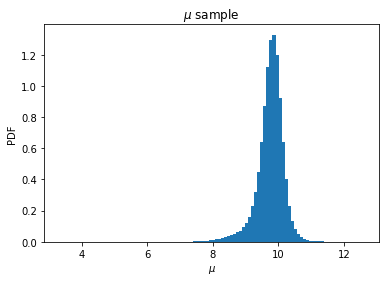

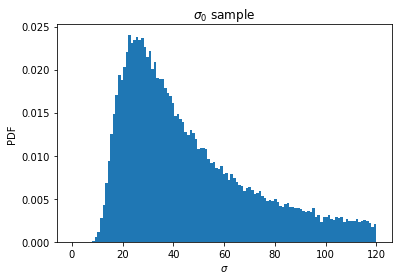

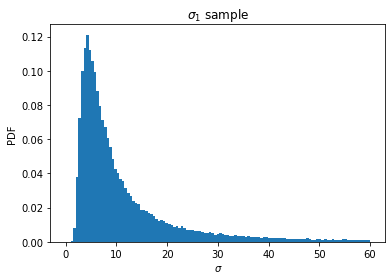

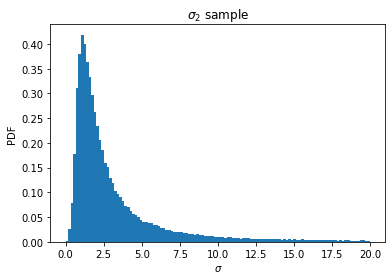

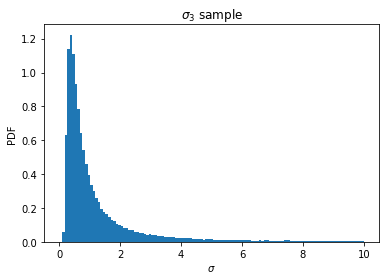

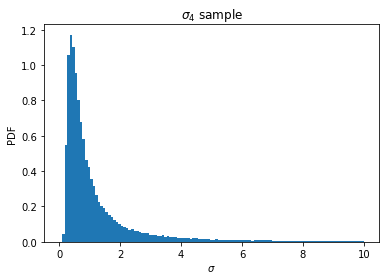

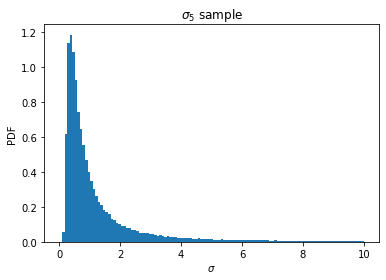

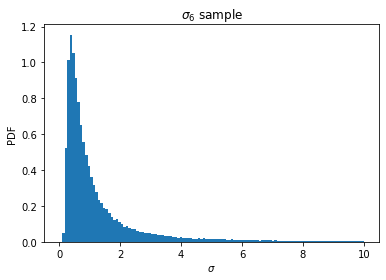

In [2]:
T=int(1e5)
N=len(x)
mu=np.zeros(T,float)
beta=np.ones([N,T],float)
rnd.seed(1)

for t in range(T):
  a=np.sum(beta[:,t-1])
  b=np.sum(x[:]*beta[:,t-1])
  mu[t]=rnd.normal(b/a,1/np.sqrt(a))
  for n in range(N):
    s_star=2./(2.*s+(x[n]-mu[t])**2.)
    beta[n,t]=rnd.gamma(c+0.5,s_star)

plt.hist(mu,bins=100,density='True')
plt.title('$\mu$ sample')
plt.xlabel('$\mu$')
plt.ylabel('PDF')
plt.show()
sigma=1./np.sqrt(beta)
bins_a=[120,60,20,10,10,10,10]
for i in range(N):
  mybins=np.linspace(0,bins_a[i],120)
  plt.hist(sigma[i],bins=mybins,density='True')
  plt.title(f'$\sigma_{i}$ sample')
  plt.xlabel('$\sigma$')
  plt.ylabel('PDF')
  plt.show()

## Question 3
**The PDF**
\begin{equation}
\mathcal{P}(x,y)=\frac{1}{Z}\,e^{-x^2-y^2-x^2y^2}\,\textbf{.}
\end{equation}
**is a non-Gaussian joint distribution whose conditional distributions are all Gaussian.**

### Point 1
**[Optional] Calculate the conditional $\mathcal{P}(x|y)$ and $\mathcal{P}(y|x)$.**

We can use the definition of conditional probability $\bigl(\mathcal{P}(A|B)=\mathcal{P}(A,B)/\mathcal{P}(B)\bigr)$ to write
\begin{equation}
\mathcal{P}(x,y)=\mathcal{P}(x|y)\,\mathcal{P}(y)\,,\qquad\mathcal{P}(y,x)=\mathcal{P}(y|x)\,\mathcal{P}(x)\,.
\end{equation}
Assuming uninformative uniform priors for both $x$ and $y$, we can write
\begin{equation}
\mathcal{P}(x,y)\propto\mathcal{P}(x|y)\,,\qquad\mathcal{P}(y,x)\propto\mathcal{P}(y|x)\,.
\end{equation}
Let's see them separately.
* $P(x|y)$ suppose $y$ as fixed, so
\begin{equation}
\begin{split}
\mathcal{P}(x|y)&\propto\frac{1}{Z}\,e^{-x^2-y^2-x^2y^2}\\
&\propto\frac{1}{Z}\,e^{-x^2-x^2y^2}\\
&\propto\frac{1}{Z}\,e^{-x^2/2[1/2(y^2+1)]}\\
&\equiv Normal\biggl(x;0,\frac{1}{2(y^2+1)}\biggr)
\end{split}\,.
\end{equation}
* $P(y|x)$ suppose $x$ as fixed, so
\begin{equation}
\begin{split}
\mathcal{P}(y|x)&\propto\frac{1}{Z}\,e^{-x^2-y^2-x^2y^2}\\
&\propto\frac{1}{Z}\,e^{-y^2-x^2y^2}\\
&\propto\frac{1}{Z}\,e^{-y^2/2[1/2(x^2+1)]}\\
&\equiv Normal\biggl(y;0,\frac{1}{2(x^2+1)}\biggr)
\end{split}\,.
\end{equation}

### Point 2
**If you are not able to calculate the conditionals, try to generate samples from $\mathcal{P}$ using rejection sampling or Metropolis algorithm or slice sampling or Gibbs, if you have solved the optional question.**

I'm going to use Gibbs' sampling as in Question 2. This time $\vec{\theta}=(x,y)$, while $P(x|y)$ and $P(y|x)$, to update $x$ and $y$ values, are ones found in Point 1.

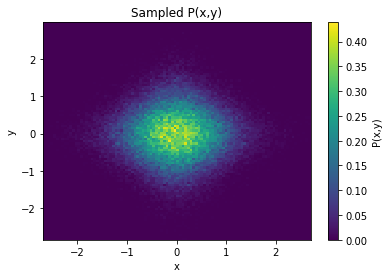

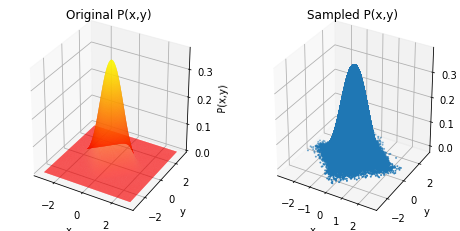

In [3]:
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d import Axes3D

T=int(1e5)
xy=np.zeros([2,T],float)
rnd.seed(1)

def P(x, y):
  f = lambda x,y : np.exp( (-(x*y)**2- y**2 -x**2 ))
  Z = dblquad(f, -np.inf, np.inf, -np.inf, np.inf)
  return np.exp( (-(x*y)**2- y**2 -x**2 ))/Z[0]

for t in range(T):
  xy[0,t]=rnd.normal(0.,1./np.sqrt(2.*(xy[1,t-1]**2.+1.)))
  xy[1,t]=rnd.normal(0.,1./np.sqrt(2.*(xy[0,t]**2.+1.)))

plt.hist2d(xy[0],xy[1],bins=100,density='True')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='P(x,y)')
plt.title('Sampled P(x,y)')
plt.show()

x = np.arange(-3,3,0.01)
y = np.arange(-3,3,0.01)
X, Y = np.meshgrid(x, y)
z = P(X,Y)
fig=plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1,2,1,projection='3d' )
ax1.plot_surface(X, Y, z, cmap='autumn', cstride=2, rstride=2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('P(x,y)')
ax1.set_title('Original P(x,y)')

z = P(xy[0],xy[1])
ax2 = fig.add_subplot(1,2,2,projection='3d' )
ax2.scatter(xy[0],xy[1],z,s=1)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('P(x,y)')
ax2.set_title('Sampled P(x,y)')
plt.show()

### Point 3

**Why not use samples from importance sampling?**

Importance sampling is a method that stay in the middle from MCMC and deterministic methods because it uses random samples from another simpler distribution $Q(\vec{\theta})$ only to find statistical properties of the hard distribution $P(\vec{\theta})$, not to sample from it.

## Question 4
**Consider**
\begin{equation}
\mathcal{P}(x)=\frac{\mathcal{P}(x)}{Z}\,\textbf{,}
\end{equation}
**where**
\begin{equation}
\mathcal{P}^*(x)=e^{0.4\,(x-0.4)^2-0.08\,x^4}\,\textbf{.}
\end{equation}

### Point 1
**Generate samples for P using rejection sampling or Metropolis algorithm.**

Let's use rejection sampling. \
We have to find a simpler distribution $Q^*(x)$ which, multiplied by the constant $c$ satisfy everywhere
\begin{equation}
cQ^*(x)>P^*(x)\qquad\forall x\,.
\end{equation}
To do things as simple as possible, let's take $Q^*(x)$ as the uniform distribution. Given that the maximum value for $P^*(x)$ is $\approx 3$, surely we can take $c=3.5$.

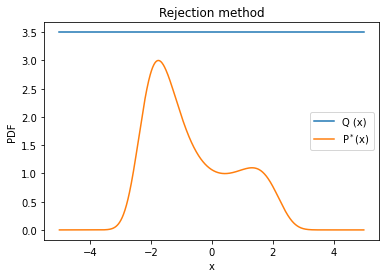

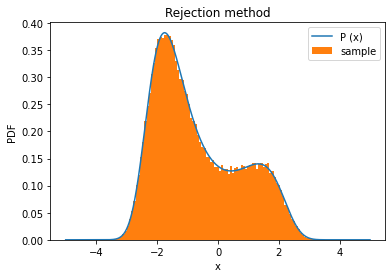

Total number of iterations: 356293
Accepted samples: 100000


In [7]:
from scipy.integrate import quad


def P_star(x):
  P=np.exp(0.4*(x-0.4)**2.-0.08*x**4.)
  return P

def P(x):
  Z = quad(P_star, -np.inf, np.inf)
  return P_star(x)/Z[0]

rnd.seed(1)

x=np.arange(-5,5,0.01)

y1=np.ones(len(x),float)*3.5
plt.plot(x,y1,label='Q (x)')
y2=P_star(x)
plt.plot(x,y2,label='P$^*$(x)')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Rejection method')
plt.legend()
plt.show()

y3=P(x)
plt.plot(x,y3,label='P (x)')
xran=[]
N=1e5
i=0
j=0
while i<N:
  j+=1
  r=rnd.rand()*8.-4.
  u=rnd.rand()*3.5
  if u<=P_star(r):
    xran.append(r)
    i+=1
xran=np.array(xran)
hist1=plt.hist(xran,density='True',bins=int(1e2),label='sample')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Rejection method')
plt.legend()
plt.show()
print(f'Total number of iterations: {j}')
print(f'Accepted samples: {i}')

### Point 2
**Generate samples for P using CDF method.**

Integrating $P(x)$ from $-\infty$ to a generic $u$, we have
\begin{equation}
\begin{split}
u=F(x)&=\int_{-\infty}^{x}dx'\,P(x')\\
&=\frac{1}{Z}\int_{-\infty}^{x}dx'\,e^{0.4\,(x'-0.4)^2-0.08\,x'^{\,4}}
\end{split}\,.
\end{equation}
Since this $F(x)$ is impossible to invert by hand, let's calculate it via numpy.cumsum(). Generating than an uniform sample for $u$, we will take as $x$ sample the one with the closest $F(x)$ value to $u$.

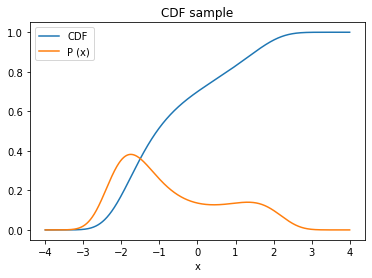

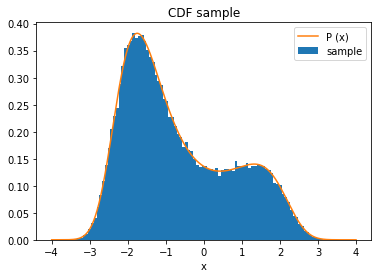

In [8]:
import time



x=np.linspace(-4,4,int(1e5))

F=np.cumsum(P(x))
F/=np.max(F)

plt.plot(x,F,label='CDF')
y3=P(x)
plt.plot(x,y3,label='P (x)')
plt.legend()
plt.xlabel('x')
plt.title('CDF sample')
plt.show()

x_cdf=[]
for i in range(len(x)):
  u=np.random.rand()
  x_cdf.append(x[np.argmin(np.abs(F-u))])

x_cdf=np.array(x_cdf)
hist2=plt.hist(x_cdf,density='True',bins=int(1e2),label='sample')
plt.plot(x,y3,label='P (x)')
plt.xlabel('x')
plt.title('CDF sample')
plt.legend()
plt.show()


### Point 3
**How can you test whether two samples are pulled from the same population? Do it for the samples generated in other points (one with CDF the other from rejection, Metropolis or slice sampling).**

To do this, I decided to do a reduced $\chi^2$ test, where this is given by
\begin{equation}
\chi^2_{red}=\frac{1}{\text{dof}}\sum_i\frac{(f_i-\bar{f})^2}{\bar{f}}\,,
\end{equation}
where $f_i$ is the observed frequency for one value, $\bar{f}$ is the expected frequency and $\text{dof}$ are the number od model's degrees of freedom. In our case, two $\chi^2_{red}$ were calculated: one considering the cdf sample as the observed data and the rejection sample as the theoretical model prediction, and one changing roles. Different $f$ will be the hight of previous points' histogram bins, so $\text{dof}$ = "# of bins used". Here we want to test if samples are from the same population, so the more the $\chi^2_{red}$ is close to zero, the closest they are (usually this means overfitting, but our pdfs are generated to be equal).

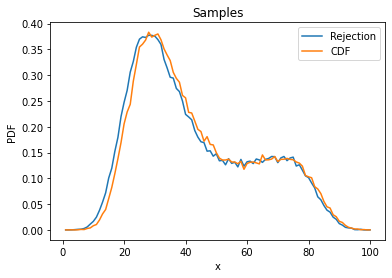

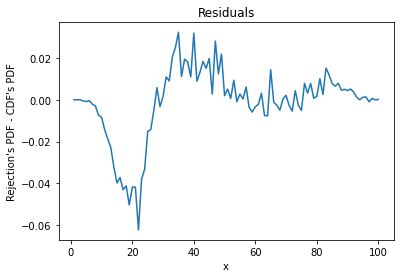

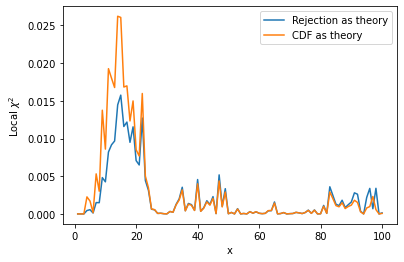

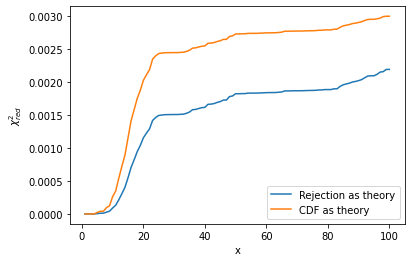

Theory ---> Rejection, Data ---> CDF: Reduced chi square = 0.0021879846796651046
Theory ---> CDF, Data ---> Rejection: Reduced chi square = 0.002993070310867868
bins = 100


In [9]:
xran=hist1[0]
x_cdf=hist2[0]


x_cdf=np.where(x_cdf==0.,xran,x_cdf)             ### I need to delete null values

x_plot=np.linspace(1,len(xran),len(xran))
plt.plot(x_plot,xran,label='Rejection')
plt.plot(x_plot,x_cdf,label='CDF')
plt.title('Samples')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.show()

x_abs=x_cdf-xran
plt.plot(x_plot,x_abs)
plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('Rejection\'s PDF - CDF\'s PDF')
plt.show()

chisq_ran_a=(x_cdf-xran)**2./xran
chisq_cdf_a=(xran-x_cdf)**2./x_cdf
chisq_ran=[]
chisq_cdf=[]
for i in range(len(chisq_ran_a)):
  chisq_ran_iter=np.sum(chisq_ran_a[0:i])
  chisq_cdf_iter=np.sum(chisq_cdf_a[0:i])
  chisq_ran.append(chisq_ran_iter)
  chisq_cdf.append(chisq_cdf_iter)
chisq_ran=np.array(chisq_ran)
chisq_cdf=np.array(chisq_cdf)
chisq_ran/=float(len(xran))
chisq_cdf/=float(len(xran))


plt.plot(x_plot,chisq_ran_a,label='Rejection as theory')
plt.plot(x_plot,chisq_cdf_a,label='CDF as theory')
plt.xlabel('x')
plt.ylabel('Local $\chi^2$')
plt.legend()
plt.show()
plt.plot(x_plot,chisq_ran,label='Rejection as theory')
plt.plot(x_plot,chisq_cdf,label='CDF as theory')
plt.xlabel('x')
plt.ylabel('$\chi^2_{red}$')
plt.legend()
plt.show()

print(f'Theory ---> Rejection, Data ---> CDF: Reduced chi square = {chisq_ran[-1]}')
print(f'Theory ---> CDF, Data ---> Rejection: Reduced chi square = {chisq_cdf[-1]}')
print(f'bins = {len(xran)}')